# KPMG VIRTUAL INTERNSHIP PROJECT

#### TASK: 1 - Data Quality Assessment

###### Assessment of data quality and completeness in preparation for analysis.

###### The client provided KPMG with 3 datasets:
- 1.Customer Demographic
- 2.Customer Addresses
- 3.Transactions data in the past 3 months

In [1]:
# Importing the Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we have now imported all the Necessary Modules

In [2]:
# Loading the Data 

DF= pd.ExcelFile('KPMG_VI_DATA.xlsx')

# As you can see that now i have loaded my dataset and now i will read each file separately and then preprocess it.


### 1. Transactions Data

In [3]:
Transactions_df=pd.read_excel(DF,'Transactions')

In [4]:
# Lets View the data now

Transactions_df.head()

# Please save the above syntax to view for the future reference

# As you can see that there are many columns

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
Transactions_df.shape

# Please note that in the above syntax to check the table shape dont use paranthesis after df.shape -----x----

(20000, 13)

In [6]:
Transactions_df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [7]:
# Lets check now if we have any null values
Transactions_df.isnull().sum()

#Please save this for future reference to check null values

# As you can see 7 columns there are null values

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

### Initial Findings
-  There are missing values in 7 columns. These missing values can't be imputed by any means. It's better to get rid of these uninformative features.

In [8]:
Transactions_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [9]:
# product_first_sold_date  having datatype float it should be in datetime  format
# lets convert product_first_sold_date  into date time
# converting the float to datetime format 
Transactions_df['product_first_sold_date'] = pd.to_datetime(Transactions_df['product_first_sold_date'], unit='s') 
  
# printing dataframe 
print(Transactions_df)
print()
  
print(Transactions_df.dtypes)

       transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.0   

      order_status         

In [10]:
#Lets check for duplicate values
Transactions_df.duplicated().sum()

#There are no duplicate values, so the data is unique.

0

In [11]:
#Lets check for number of unique values in columns.

Transactions_df.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

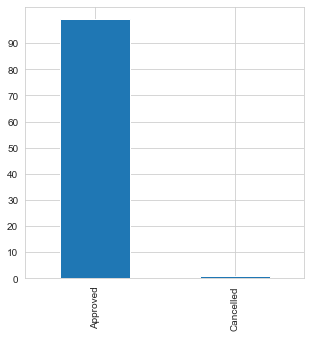

In [12]:
plt.figure(figsize = (5,5))
sns.set_style('whitegrid')

(Transactions_df['order_status'].value_counts(normalize = True)*100).head().plot(kind = 'bar');

plt.yticks(np.arange(0,100,10));

- 95% of orders have an approved status, meaning that most orders are approved and few orders are cancelled.

In [13]:
# creating month and year columns for futher analysis

Transactions_df["Month"] = Transactions_df["transaction_date"].dt.month
Transactions_df["Year"] = Transactions_df["transaction_date"].dt.year

In [14]:
Transactions_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Month,Year
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,2,2017
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,5,2017
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,10,2017
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,8,2017
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,10,2017


In [15]:
Transactions_df["Month"] = Transactions_df["Month"].astype("int")
Transactions_df["Year"] = Transactions_df["Year"].astype("int")

In [16]:
# creating month-year-wise column

Transactions_df["Month_Year_wise"] = Transactions_df['transaction_date'].dt.month.astype(str) + '-' + Transactions_df['transaction_date'].dt.year.astype(str)


In [17]:
Transactions_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Month,Year,Month_Year_wise
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,2,2017,2-2017
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,5,2017,5-2017
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,10,2017,10-2017
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,8,2017,8-2017
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,10,2017,10-2017


#### creating a dataframe which we'll use for yearly and monthly analysis

In [18]:

Transactions_df_month_agg = Transactions_df.groupby("Month_Year_wise",as_index=False).agg({"list_price":"sum", "Year":"first", "Month":"first"})
Transactions_df_month_agg = Transactions_df_month_agg.sort_values(by=['Year','Month'])
Transactions_df_month_agg

,Month_Year_wise,list_price,Year,Month
0,1-2017,1866059.26,2017,1
4,2-2017,1798445.83,2017,2
5,3-2017,1817617.50,2017,3
6,4-2017,1843009.18,2017,4
7,5-2017,1908723.04,2017,5
8,6-2017,1755400.31,2017,6
9,7-2017,1892999.67,2017,7
10,8-2017,1933992.35,2017,8
11,9-2017,1744175.53,2017,9
1,10-2017,1962655.77,2017,10


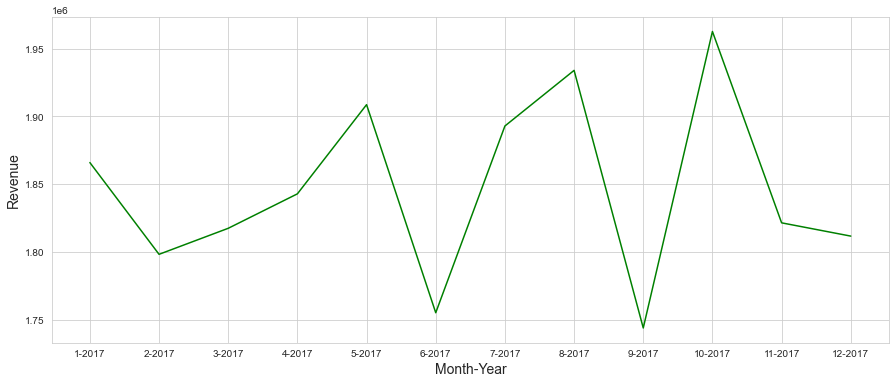

In [19]:
plt.figure(figsize=(15,6))

plt.plot(Transactions_df_month_agg["Month_Year_wise"],Transactions_df_month_agg["list_price"], color='green')

plt.xlabel("Month-Year", fontsize=14)
plt.ylabel("Revenue", fontsize=14);

- We can see that revenue drops exponentially from January to June of 2017.
Following that, we can see that revenue has increased exponentially since September 2017.

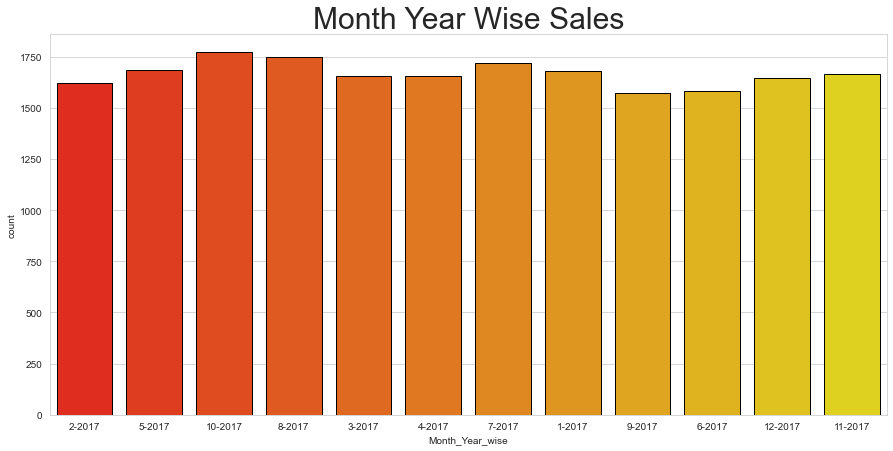

In [20]:
plt.figure(figsize=(15,7))
plt.title("Month Year Wise Sales",size=30)
sns.countplot(x=Transactions_df["Month_Year_wise"],edgecolor="black",palette='autumn');

- We can say that from 02-2017 to 11-2017, we had a stable rate of growth, but in the month of 10-2017, we had the highest number of sales.


In [21]:
Transactions_df['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

c:\Users\akshay0909\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


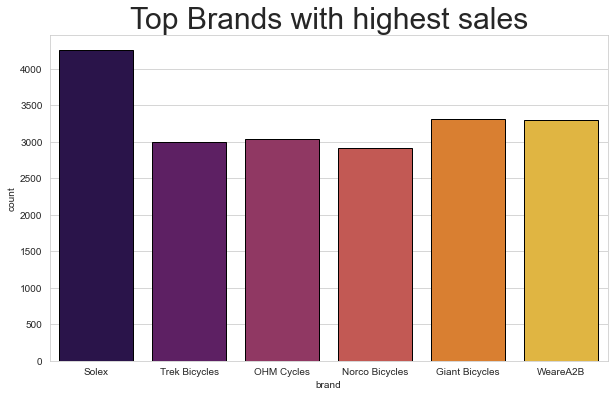

In [22]:

plt.figure(figsize=(10,6))
plt.title("Top Brands with highest sales",size=30)
sns.countplot(Transactions_df['brand'], palette='inferno',edgecolor="black")
plt.show()

- As we can see, the Solex brand has the most sales, followed by Giant Bicycles and WeareA2B Brands, which have the second-highest sales.

- In Brand column 197 null values are present.These missing values can't be imputed by any means. It's better to get rid of these uninformative features.After filling those missing values above visualizations of brands may difffer.


In [23]:
Transactions_df['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

c:\Users\akshay0909\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


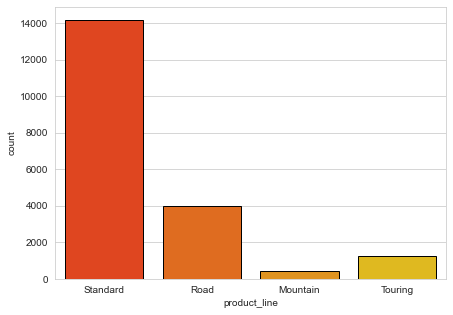

In [24]:
plt.figure(figsize=(7,5))
sns.countplot(Transactions_df['product_line'],edgecolor="black",palette='autumn')
plt.show()

-  In product_line column 197 null values are present.These missing values can't be imputed by any means. It's better to get rid of these uninformative features.After filling those missing values above visualizations  may difffer.

In [25]:
Transactions_df['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

c:\Users\akshay0909\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


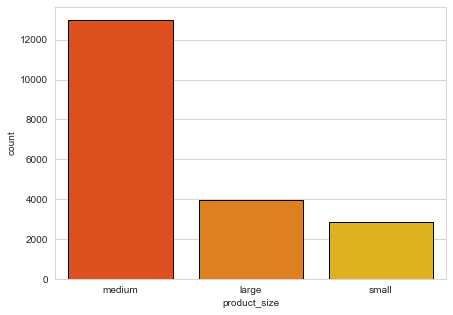

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(Transactions_df['product_size'],edgecolor="black",palette='autumn')
plt.show()

-  In product_size column 197 null values are present.These missing values can't be imputed by any means. It's better to get rid of these uninformative features.After filling those missing values above visualizations  may change.

## -2 Customer Demographic Data

In [27]:
Customer_demo_df=pd.read_excel(DF,'CustomerDemographic')

C:\Users\akshay0909\AppData\Local\Temp\ipykernel_9532\630362460.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  Customer_demo_df=pd.read_excel(DF,'CustomerDemographic')


In [28]:
Customer_demo_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [29]:
# Python Function 1 : Displays Data Information :

def display_data_information(data, data_types, dataframe_name):
    print(" Information of ",dataframe_name,": Rows = ",data.shape[0],"| Columns = ",data.shape[1],"\n")
    data.info()
    print("\n")
    for VARIABLE in data_types :
        data_type = data.select_dtypes(include=[ VARIABLE ]).dtypes
        if len(data_type) > 0 :
            print(str(len(data_type))+" "+VARIABLE+" Features\n"+str(data_type)+"\n"  )        

# Display Data Information of "Customer Demographic Data" :

data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]
display_data_information(Customer_demo_df, data_types, "Customer_demo_df")

 Information of  Customer_demo_df : Rows =  4000 | Columns =  13 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator

In [30]:
# Python Function 2 : Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table) :

def display_head_tail(data, head_rows, tail_rows):
    display("Data Head & Tail :")
    display(data.head(head_rows).append(data.tail(tail_rows)))
#     return True

# Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)
# Pass Dataframe as "train", No. of Rows in Head = 3 and No. of Rows in Tail = 2 :

display_head_tail(Customer_demo_df, head_rows=3, tail_rows=2)

'Data Head & Tail :'

C:\Users\akshay0909\AppData\Local\Temp\ipykernel_9532\1717514069.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(data.head(head_rows).append(data.tail(tail_rows)))


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0
3999,4000,Kippy,Oldland,Male,76,1991-11-05,Software Engineer IV,NaN,Affluent Customer,N,0/0,No,11.0


In [75]:
# Python Function 3 : Removes Data Duplicates while Retaining the First one - Similar to SQL DISTINCT :

def remove_duplicate(data):
    
    print("BEFORE REMOVING DUPLICATES - No. of Rows = ",data.shape[0])
    data.drop_duplicates(keep="first", inplace=True) 
    print("AFTER REMOVING DUPLICATES  - No. of Rows = ",data.shape[0])
    
    return data

# Remove Duplicates from "Customer Demographic Data" :

Duplicates= remove_duplicate(Customer_demo_df)



BEFORE REMOVING DUPLICATES - No. of Rows =  4000
AFTER REMOVING DUPLICATES  - No. of Rows =  4000


- ### No Duplicates at all in this dataset!

In [32]:
Customer_demo_df['DOB'].sort_values(ascending=True)

33     1843-12-21
719    1931-10-23
1091   1935-08-22
3409   1940-09-22
2412   1943-08-11
          ...    
3778          NaT
3882          NaT
3930          NaT
3934          NaT
3997          NaT
Name: DOB, Length: 4000, dtype: datetime64[ns]

-  ####  Born in 1843,meaning that customer is 175 years old! This is obviously an error in the data 

In [33]:
#Checking for null values
Customer_demo_df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

### Initial Findings
-  There are missing values in 6 columns. These missing values can't be imputed by any means. It's better to get rid of these uninformative features.

In [34]:
#Checking for uniqueness of each column
Customer_demo_df.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

In [35]:
Customer_demo_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [36]:
Customer_demo_df['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

- As we can see gender column male and female categories are not specified correctly , will replace "M" with "Male" , "F" with "Female" and 
 "U" with  'unknown'

In [37]:
Customer_demo_df['gender'] = Customer_demo_df['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','unknown')

In [38]:
Customer_demo_df['gender'].value_counts()

Female     2039
Male       1873
unknown      88
Name: gender, dtype: int64

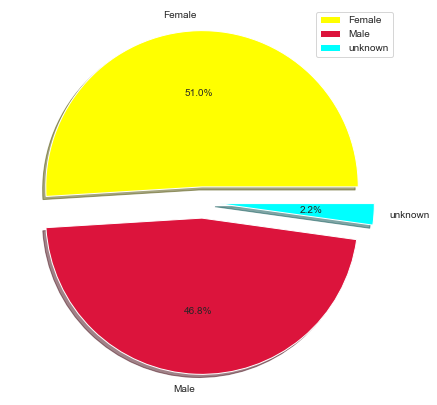

In [55]:
count_test=Customer_demo_df['gender'].value_counts()
labels=Customer_demo_df['gender'].value_counts().index
explode = [0.1,0.1,0.1]
colors = ("yellow","crimson","cyan")
plt.figure(figsize=(7,8))
plt.pie(count_test,labels=labels,autopct='%1.1f%%',explode=explode,shadow=True,colors=colors)
plt.legend(labels)
plt.show()


In [51]:
Customer_demo_df['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

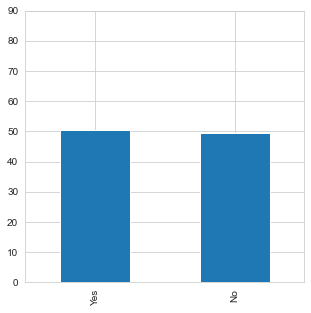

In [52]:
plt.figure(figsize = (5,5))
sns.set_style('whitegrid')

(Customer_demo_df['owns_car'].value_counts(normalize = True)*100).head().plot(kind = 'bar');

plt.yticks(np.arange(0,100,10));

- We got almost same percentage of customer who owns car and who doesn't 

In [53]:
Customer_demo_df['default'].value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

- Due to the inconsistent data in the default column, we must remove it because it is not providing us with accurate data.

c:\Users\akshay0909\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


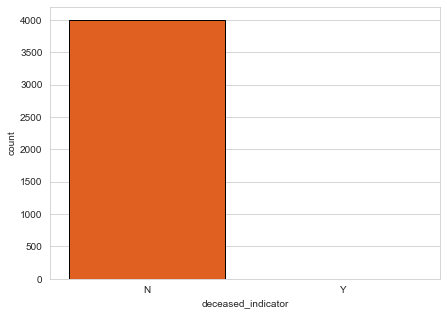

In [54]:
# Visualizing deceased_indicator

plt.figure(figsize=(7,5))
sns.countplot(Customer_demo_df['deceased_indicator'],edgecolor="black",palette='autumn')
plt.show()

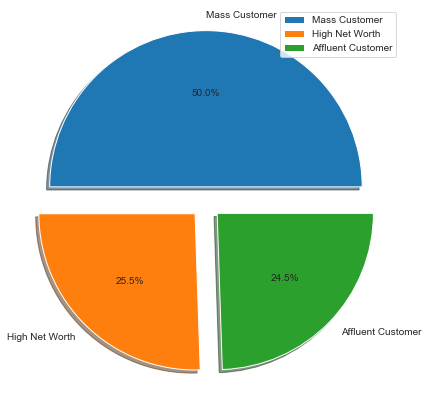

In [57]:
# Visualizing wealth_segment
count_test=Customer_demo_df['wealth_segment'].value_counts()
labels=Customer_demo_df['wealth_segment'].value_counts().index
explode = [0.1,0.1,0.1]
plt.figure(figsize=(7,8))
plt.pie(count_test,labels=labels,autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(labels)
plt.show()

- 50 % percent customer is mass customer and 25 % customer has high net worth and remaining 24 % percent customer are affluent customer

c:\Users\akshay0909\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


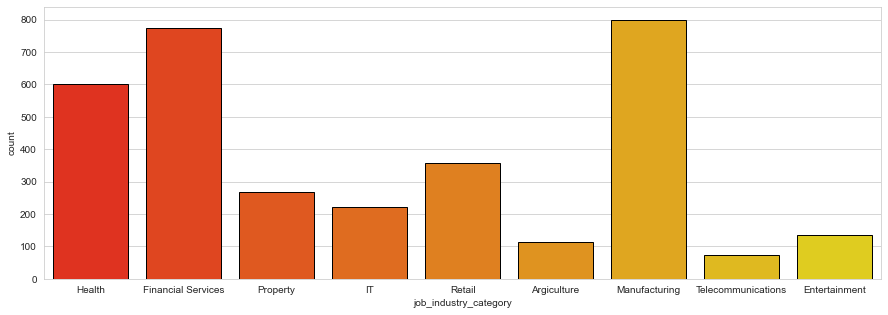

In [64]:

# Visualizing job_industry_category

plt.figure(figsize=(15,5))
sns.countplot(Customer_demo_df['job_industry_category'],edgecolor="black",palette='autumn')
plt.show()

## - 3. CustomerAddress Data

In [70]:
Customer_add_df=pd.read_excel(DF,'CustomerAddress')

In [72]:
Customer_add_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [73]:
display_data_information(Customer_add_df, data_types, "Customer_add_df")

 Information of  Customer_add_df : Rows =  3999 | Columns =  6 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


3 int64 Features
customer_id           int64
postcode              int64
property_valuation    int64
dtype: object

3 object Features
address    object
state      object
country    object
dtype: object



In [74]:
display_data_information(Customer_add_df, data_types, "Customer_add_df")

 Information of  Customer_add_df : Rows =  3999 | Columns =  6 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


3 int64 Features
customer_id           int64
postcode              int64
property_valuation    int64
dtype: object

3 object Features
address    object
state      object
country    object
dtype: object



In [77]:
# Remove Duplicates from "Customer Demographic Data" :

Duplicates_1= remove_duplicate(Customer_add_df)

BEFORE REMOVING DUPLICATES - No. of Rows =  3999
AFTER REMOVING DUPLICATES  - No. of Rows =  3999


- ### No Duplicates at all in this dataset!

In [78]:
#Checking for null values
Customer_add_df.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [79]:
#Checking for uniqueness of each column
Customer_add_df.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

c:\Users\akshay0909\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


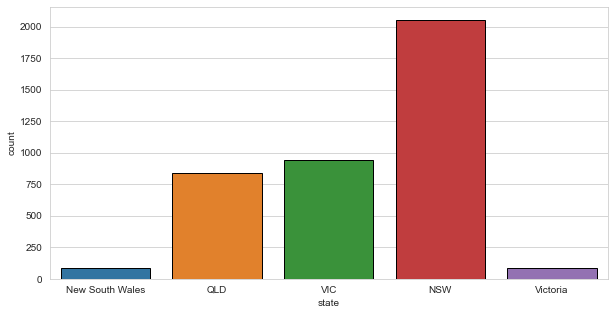

In [81]:
# Visualizing State Column

plt.figure(figsize=(10,5))
sns.countplot(Customer_add_df['state'],edgecolor="black")
plt.show()